<a href="https://colab.research.google.com/github/AleOi2/PSI3472/blob/master/Aula3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 1

In [ ]:
# mlp1.py
import tensorflow.keras as keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
import numpy as np
import sys
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import random
(AX, AY), (QX, QY) = mnist.load_data()
AX=255-AX; QX=255-QX

axDimension = AX.shape[0]
n = 6000
np.random.seed(42)
random_numbers = np.random.random(size=6000)
randomList = []

for i in range(0, n):
    # any random numbers from 0 to AX length
    randomList.append(random.randint(0, axDimension - 1))
randomArray = np.array(randomList)

AX = AX[randomArray]
AY = AY[randomArray]

print("AX dimension")
print(AX.shape[0])
print("AY dimension")
print(AY.shape[0])

nclasses = 10
AY2 = keras.utils.to_categorical(AY, nclasses)
QY2 = keras.utils.to_categorical(QY, nclasses)
nl, nc = AX.shape[1], AX.shape[2] #28, 28
AX = AX.astype('float32') / 255.0 # 0 a 1
QX = QX.astype('float32') / 255.0 # 0 a 1
model = Sequential()
model.add(Flatten(input_shape=(nl,nc)))
model.add(Dense(400, activation='sigmoid'))
model.add(Dense(nclasses, activation='sigmoid'))
#from keras.utils import plot_model
#plot_model(model, to_file='mlp1.png', show_shapes=True)
from keras.utils import plot_model
plot_model(model, to_file='cnn1.png', show_shapes=True); model.summary()
#opt=optimizers.sgd(lr=0.5)
opt=optimizers.Adam()
model.compile(optimizer=opt,
#  loss='mse',
 loss='categorical_crossentropy',
 metrics=['accuracy'])
model.fit(AX, AY2,
 batch_size=100,
 epochs=40,
 verbose=True);
score = model.evaluate(QX, QY2, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('Exercicio1.h5')

AX dimension
6000
AY dimension
6000
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_28 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_64 (Dense)             (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
60/60 [==============================] - 0s 6ms/step - loss: 1.8769 - accuracy: 0.3312
Epoch 2/40
60/60 [==============================] - 0s 5ms/step - loss: 0.8157 - accuracy: 0.7945
Epoch 3/40
60/60 [==============================] - 0s 5ms/step - loss: 0.5769 - accuracy: 0.8442
Epoch 4/40
60/60 [=============================

# Exercício 2

In [ ]:
# mlp1.py
import tensorflow.keras as keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
import numpy as np
import sys
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
(AX, AY), (QX, QY) =  fashion_mnist.load_data()
AX=255-AX; QX=255-QX
nclasses = 10

AY2 = keras.utils.to_categorical(AY, nclasses)
QY2 = keras.utils.to_categorical(QY, nclasses)
nl, nc = AX.shape[1], AX.shape[2] #28, 28
AX = AX.astype('float32') / 255.0 # 0 a 1
QX = QX.astype('float32') / 255.0 # 0 a 1
model = Sequential()
model.add(Flatten(input_shape=(nl,nc)))
model.add(Dense(400, activation='sigmoid'))
model.add(Dense(nclasses, activation='sigmoid'))
from keras.utils import plot_model
plot_model(model, to_file='cnn1.png', show_shapes=True); model.summary()
opt=optimizers.Adam()
model.compile(optimizer=opt,
 loss='categorical_crossentropy',
 metrics=['accuracy'])
model.fit(AX, AY2,
 batch_size=200,
 epochs=60,
 verbose=True);
score = model.evaluate(QX, QY2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_70 (Dense)             (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
300/300 [==============================] - 3s 9ms/step - loss: 0.7556 - accuracy: 0.7443
Epoch 2/60
300/300 [==============================] - 3s 8ms/step - loss: 0.5055 - accuracy: 0.8187
Epoch 3/60
300/300 [==============================] - 3s 8ms/step - loss: 0.4692 - accuracy: 0.8324
Epoch 4/60
300/300 [==============================] - 3s 8ms/step - loss: 0.4

Predicted Response
9 Ankle boot 2 Pullover 1 Trouser 1 Trouser 6 Shirt 1 Trouser 4 Coat 6 Shirt 5 Sandal 7 Sneaker 
Test response
9 Ankle boot 2 Pullover 1 Trouser 1 Trouser 6 Shirt 1 Trouser 4 Coat 6 Shirt 5 Sandal 7 Sneaker 

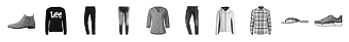

In [ ]:
import keras 
import numpy as np

def convertNumberToCategory(number):
  relation = {
      0: 'T-shirt/top',
      1: 'Trouser',
      2: 'Pullover',
      3: 'Dress',
      4: 'Coat',
      5: 'Sandal',
      6: 'Shirt',
      7: 'Sneaker',
      8: 'Bag',
      9: 'Ankle boot',
  }
  return relation[number]

def printImageAndCategory(image, image_out, category, numrow, numcol, relation):
  from matplotlib import pyplot as plt
  f = plt.figure()
  index = 1
  print("Predicted Response")
  for img in image:
    f.add_subplot(numrow,numcol,index)
    plt.imshow(img,cmap="gray")
    plt.axis('off')
    print(category[index - 1], relation(category[index - 1]),  end=' ')    
    index = index + 1
  print("")
  print("Test response")
  for img in image_out:
    print(img, relation(img),  end=' ')
  plt.show()

prediction = model.predict(QX)
initial = 0
final = 10
# Test input
test_input = QX[initial:final]
# Test output
test_output = QY[initial:final]
#  Prediction
result = []
[ result.append(np.argmax(prediction)) for prediction in prediction[initial:final] ]
printImageAndCategory(test_input, test_output, result, 1, final, convertNumberToCategory)